# Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records

#### Created by: 
Paz Bunis (pazbunis@gmail.com)
#### based on:
Beata Strack, Jonathan P. DeShazo, Chris Gennings, et al., “Impact of HbA1c
Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database
Patient Records,” BioMed Research International, vol. 2014, 11 pages, 2014.

## 0. Imports and Initialization

In [2]:
from matplotlib import style as style
import matplotlib.pyplot as plt
%matplotlib inline
style.use('ggplot')
import pandas as pd
import numpy as np
import scipy.stats as stats
from kmodes import kmodes
from sklearn.model_selection import KFold
encounters = pd.read_csv('dataset/diabetic_data.csv')
msk = np.random.rand(len(encounters)) < 0.9
encounters_train = encounters[msk]
encounters_test = encounters[~msk]

## 1. Descriptive Statistics
### 1.1. Gender vs. other attributes

#### 1.1.1. Gender vs. Age

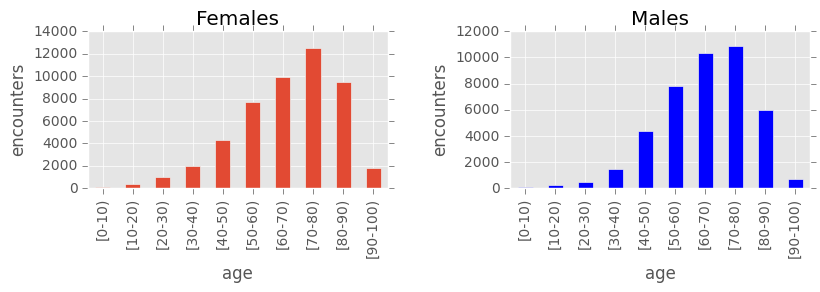

In [351]:
females_age_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('age').size()
males_age_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('age').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[1].set_ylabel("encounters")
fig.tight_layout(pad=4)
females_age_grouping.plot.bar(ax = axs[0], title = 'Females')
males_age_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.1.2. Gender vs. Race

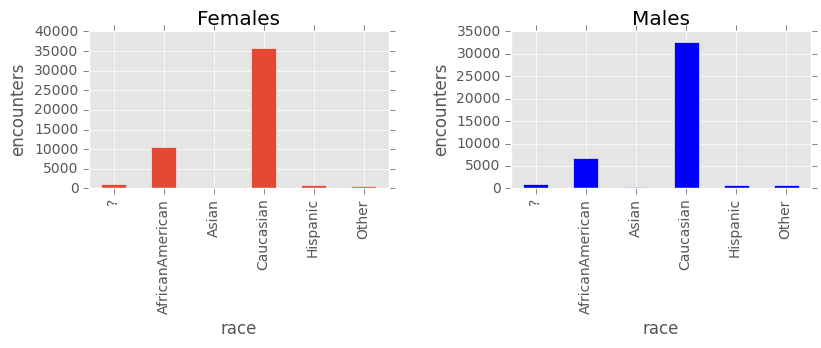

In [352]:
females_race_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('race').size()
males_race_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('race').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[1].set_ylabel("encounters")
fig.tight_layout(pad=4)
females_race_grouping.plot.bar(ax = axs[0], title = 'Females')
males_race_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.1.3. Gender vs. Readmission Value

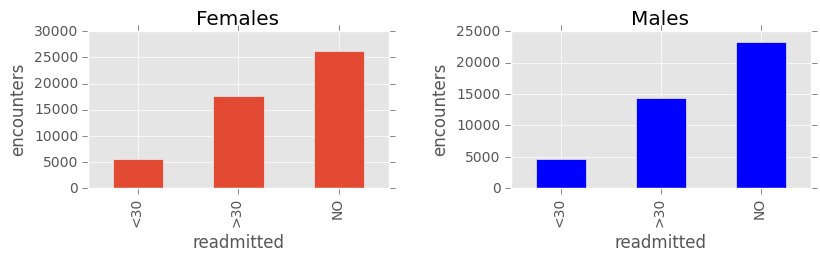

In [353]:
females_readmission_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('readmitted').size()
males_readmission_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('readmitted').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[1].set_ylabel("encounters")
fig.tight_layout(pad=4)
females_readmission_grouping.plot.bar(ax = axs[0], title = 'Females')
males_readmission_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.1.4. Gender vs. Most Frequently Used ICD-9 Codes
(All three diagnosis types are combined to one column)

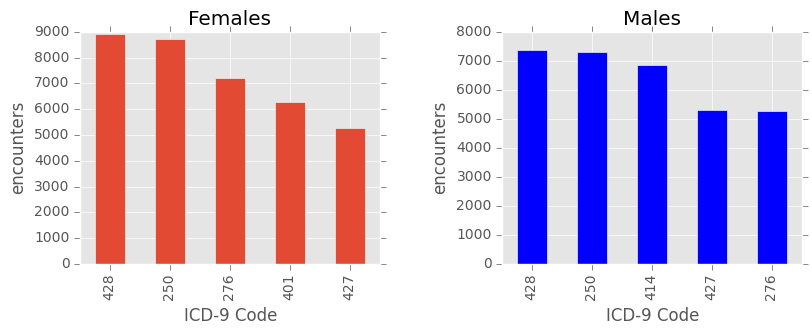

In [354]:
fem_diags_projection = encounters_train[encounters_train.gender == 'Female'][['diag_1', 'diag_2', 'diag_3']]
fem_diags_arr = [fem_diags_projection[['diag_1']],fem_diags_projection[['diag_2']],fem_diags_projection[['diag_3']]]
fem_comb_diags = pd.concat(fem_diags_arr, axis=1).stack().reset_index(drop=True)

male_diags_projection = encounters_train[encounters_train.gender == 'Male'][['diag_1', 'diag_2', 'diag_3']]
male_diags_arr = [male_diags_projection[['diag_1']],male_diags_projection[['diag_2']],male_diags_projection[['diag_3']]]
male_comb_diags = pd.concat(male_diags_arr, axis=1).stack().reset_index(drop=True)

fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].set_ylabel("encounters")
axs[0].set_xlabel("ICD-9 Code")
axs[1].set_ylabel("encounters")
axs[1].set_xlabel("ICD-9 Code")
fig.tight_layout(pad=4)
fem_comb_diags.value_counts().head().plot.bar(ax = axs[0], title = 'Females')
male_comb_diags.value_counts().head().plot.bar(ax = axs[1], title = 'Males', color='b')

### 1.2. Days in Hospital and A1c Test Results

#### 1.2.1. Days in Hospital vs. Gender

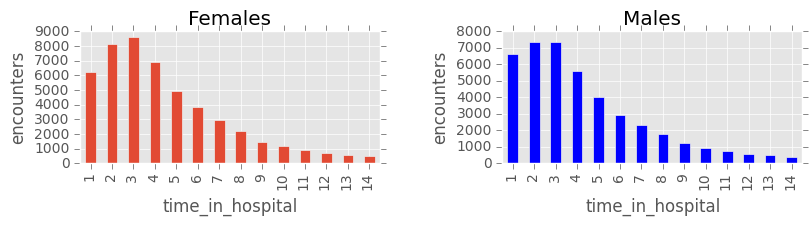

In [355]:
females_hospital_time_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('time_in_hospital').size()
males_hospital_time_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('time_in_hospital').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[0].set_xlabel("days")
axs[1].set_ylabel("encounters")
axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
females_hospital_time_grouping.plot.bar(ax = axs[0], title = 'Females')
males_hospital_time_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.2.2. Days in Hospital vs. Age Group

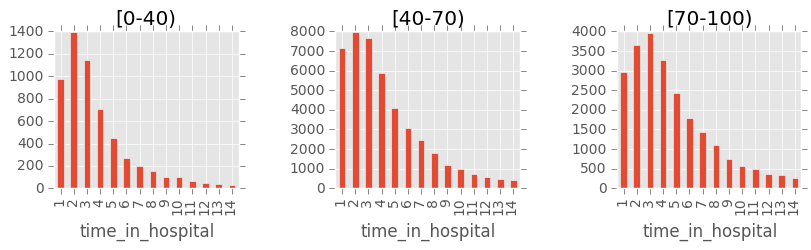

In [356]:
age_group1= encounters_train[encounters_train.age.isin(['[0-10)','[10-20)', '[20-30)', '[30-40)'])]
age_group2= encounters_train[encounters_train.age.isin(['[40-50)', '[50-60)', '[60-70)'])]
age_group3= encounters_train[encounters_train.age.isin(['[70-80)', '[80-90), [90-100)'])]
group1_hospital_time = age_group1.groupby('time_in_hospital').size()
group2_hospital_time = age_group2.groupby('time_in_hospital').size()
group3_hospital_time = age_group3.groupby('time_in_hospital').size()

fig, axs = plt.subplots(1,3, figsize=(9,3))
# axs[0].set_ylabel("encounters")
# axs[0].set_xlabel("days")
# axs[1].set_ylabel("encounters")
# axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
group1_hospital_time.plot.bar(ax = axs[0], title = '[0-40)')
group2_hospital_time.plot.bar(ax = axs[1], title = '[40-70)')
group3_hospital_time.plot.bar(ax = axs[2], title = '[70-100)')

#### 1.2.3. A1c test results vs. Gender

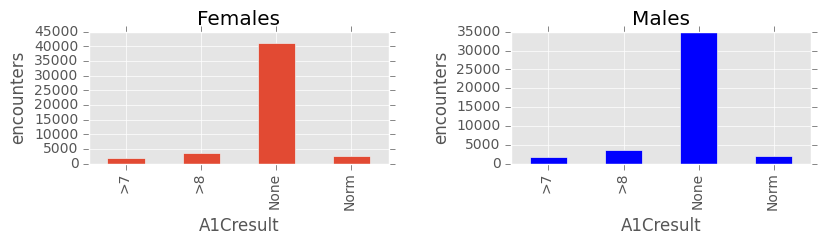

In [357]:
females_A1C_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('A1Cresult').size()
males_A1C_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('A1Cresult').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[0].set_xlabel("days")
axs[1].set_ylabel("encounters")
axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
females_A1C_grouping.plot.bar(ax = axs[0], title = 'Females')
males_A1C_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.2.4. A1c test results vs. Age Group

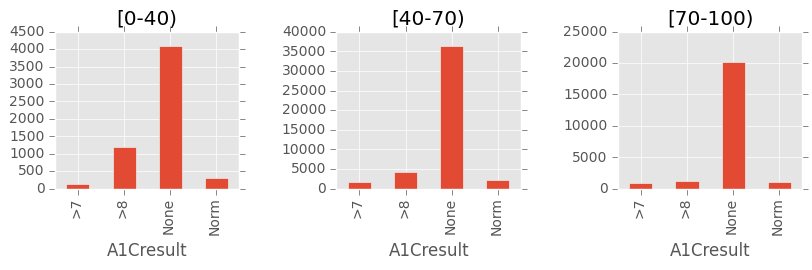

In [358]:
age_group1= encounters_train[encounters_train.age.isin(['[0-10)','[10-20)', '[20-30)', '[30-40)'])]
age_group2= encounters_train[encounters_train.age.isin(['[40-50)', '[50-60)', '[60-70)'])]
age_group3= encounters_train[encounters_train.age.isin(['[70-80)', '[80-90), [90-100)'])]
group1_hospital_time = age_group1.groupby('A1Cresult').size()
group2_hospital_time = age_group2.groupby('A1Cresult').size()
group3_hospital_time = age_group3.groupby('A1Cresult').size()

fig, axs = plt.subplots(1,3, figsize=(9,3))
# axs[0].set_ylabel("encounters")
# axs[0].set_xlabel("days")
# axs[1].set_ylabel("encounters")
# axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
group1_hospital_time.plot.bar(ax = axs[0], title = '[0-40)')
group2_hospital_time.plot.bar(ax = axs[1], title = '[40-70)')
group3_hospital_time.plot.bar(ax = axs[2], title = '[70-100)')

### 1.3. Other Results

In [359]:
# TODO: add more Descriptive Statistics

## 2. Hypothesis Testing

### 2.1. Is Testing HbA1c  Associated With a Reduced Rate of Readmission?
Our null hypothesis $H_0$ is that there is no correlation between the HbA1c test and the rate of readmission.
In order to test this, we will use the Fisher exact test and the Chi-square test (which is supposed to be better for larger numbers).

In [360]:
proj = encounters_train[['A1Cresult', 'readmitted']]
ct = pd.crosstab(proj.A1Cresult, proj.readmitted, margins=True)
ct['readmitted'] = ct['<30'] 
ct['not_readmitted'] = ct['>30'] + ct['NO']
ct = ct[['readmitted', 'not_readmitted', 'All']]
N_readmitted_tested = ct.readmitted.All - ct.readmitted['None']
N_readmitted_not_tested = ct.readmitted['None']
N_not_readmitted_tested = ct.not_readmitted.All - ct.not_readmitted['None']
N_not_readmitted_not_tested = ct.not_readmitted['None']

print(ct)

readmitted  readmitted  not_readmitted    All
A1Cresult                                    
>7                 351            3095   3446
>8                 730            6661   7391
None              8699           67563  76262
Norm               427            4061   4488
All              10207           81380  91587


####  Fisher Exact Test 

In [361]:
contingency_table = [[N_readmitted_tested, N_readmitted_not_tested],[N_not_readmitted_tested, N_not_readmitted_not_tested]]
odds_ratio, p_val = scipy.stats.fisher_exact(contingency_table)
print('Odds ratio: ' + str(odds_ratio))
print('P-value: ' + str(p_val))

Odds ratio: 0.847670712709
P-value: 1.30962438448e-08


As we see here, we get $p < 0.001$ and an odds-ratio which is significantly lower than 1, so we should reject the null hypothesis.


####  Chi-Square Test

In [362]:
statistic, p_val, _, _ =scipy.stats.chi2_contingency(contingency_table, correction=True)
print('Statistic value: ' + str(statistic))
print('P-value: ' + str(p_val))

Statistic value: 31.4678575865
P-value: 2.02769158494e-08


We got a high $\chi^2$ value and $p < 0.001$, so we again conclude that we should reject the null hypothesis.

### 2.2. Is Drug Prescription or Dosage Change Associated With a Reduced Rate of Readmission? 


Our null hypothesis  $H_0$  is that there is no correlation between drug prescription or dosage change and the rate of readmission. 
As before, we use the Fisher exact test and the Chi-square test for added robustness. 

In [363]:
drug_change_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
                       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 
                       'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
                       'metformin-rosiglitazone', 'metformin-pioglitazone', 'diabetesMed']
drug_df = encounters_train[drug_change_columns]
indicators = drug_df.apply(lambda x: ("Up" in x) or (x.diabetesMed == "Yes"), axis=1) 
df = pd.DataFrame(data = {'prescribed_or_upped': indicators, 'readmitted': encounters_train['readmitted']})
ct = pd.crosstab(df.prescribed_or_upped, df.readmitted, margins=True)
ct['readmitted'] = ct['<30'] 
ct['not_readmitted'] = ct['>30'] + ct['NO']
ct = ct[['readmitted', 'not_readmitted', 'All']]
print(ct)
N_readmitted_prescribed_or_upped = ct.readmitted[True]
N_readmitted_not_prescribed_or_upped = ct.readmitted[False]
N_not_readmitted_prescribed_or_upped = ct.not_readmitted[True]
N_not_readmitted_not_prescribed_or_upped = ct.not_readmitted[False]

readmitted           readmitted  not_readmitted    All
prescribed_or_upped                                   
False                      2006           19008  21014
True                       8201           62372  70573
All                       10207           81380  91587


####  Fisher Exact Test

In [364]:
contingency_table = [[N_readmitted_prescribed_or_upped, N_readmitted_not_prescribed_or_upped],
                     [N_not_readmitted_prescribed_or_upped, N_not_readmitted_not_prescribed_or_upped]]
odds_ratio, p_val = stats.fisher_exact(contingency_table)
print('Odds ratio: ' + str(odds_ratio))
print('P-value: ' + str(p_val))

Odds ratio: 1.2458984235
P-value: 1.75381941428e-17


As we see here, we get $p < 0.001$ and an odds-ratio which is significantly higher than 1, so we should reject the null hypothesis.

####  Chi-Square Test

In [369]:
statistic, p_val, _, _ = stats.chi2_contingency(contingency_table, correction=True)
print('Statistic value: ' + str(statistic))
print('P-value: ' + str(p_val))

Statistic value: 70.1664684295
P-value: 5.4505102726e-17


We got a high $\chi^2$ value and $p < 0.001$, so we again conclude that we should reject the null hypothesis.

## 3.Clustering and Similarity

### 3.1. Defining a Metric 

Since we are clustreting categorical data, one logical option is using the following metric:

Let $X,Y$ be two rows of length $k$ in the data set. Assume that for all $i \in [k]$, $X_i,Y_i \in A_i$ ($A_i$ is a categorical field, for example the 'readmitted' field).

Then: $d(X,Y)= \sum_i \mathbb{1}[X_i \neq Y_i]$

A cluster centroid will be a point $C \in A_1 \times A_2 \times ... \times A_k$.

### 3.2.  Using K-Modes to Cluster Patients

K-modes is a clustering algorithm which uses the metric defined above, and is closely related to K-Means.

It uses the same type of expectation-maximization steps, but updates the centroids at each iteration by the "mode" of the categories, which is the category that has the highest count (within the cluster).

For example, if $\{X^1, X^2, X^3\}$ are one cluster with centroid $C$, then our update will be:
$$C_i=argmax_{c \in A_i} (\mathbb{1}[X^{1}_{i} = c]+ \mathbb{1}[X^{2}_{i} = c] + \mathbb{1}[X^{3}_{i} = c])$$

In [370]:
# cluster_df = pd.DataFrame({'res': encounters_train[['A1Cresult']]}, dtype="category")
diag_1 = encounters_train[['diag_1']]['diag_1'].astype("category")
diag_2 = encounters_train[['diag_2']]['diag_2'].astype("category")
diag_3 = encounters_train[['diag_3']]['diag_3'].astype("category")
A1Cres = encounters_train[['A1Cresult']]['A1Cresult'].astype("category")
readmitted = encounters_train[['readmitted']]['readmitted'].astype("category")

cols = {'diag_1': diag_1, 'diag_2': diag_2, 'diag_3': diag_3,
        'A1Cres': A1Cres, 'readmitted': readmitted}
cluster_df = pd.DataFrame(data = cols, dtype="category")
c1 = np.array(cluster_df.diag_1.cat.codes)
c2 = np.array(cluster_df.diag_2.cat.codes)
c3 = np.array(cluster_df.diag_3.cat.codes)
c4 = np.array(cluster_df.A1Cres.cat.codes)
c5 = np.array(cluster_df.readmitted.cat.codes)
t = np.matrix([c1, c2, c3, c4, c5]).transpose()
km = kmodes.KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(t)
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 30118, cost: 263910.0
Run 1, iteration: 2/100, moves: 1966, cost: 263910.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6921, cost: 267680.0
Run 2, iteration: 2/100, moves: 1068, cost: 267680.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6268, cost: 286455.0
Run 3, iteration: 2/100, moves: 3031, cost: 286455.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 38724, cost: 262285.0
Run 4, iteration: 2/100, moves: 330, cost: 262285.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3965, cost: 269424.0
Run 5, iteration: 2/100, moves: 0, cost: 269424.0
Best run was number 4
[[274 256 84 2 1]
 [261 255 265 2 2]
 [261 130 243

Since we are going to cluster categorical data, a logical choice is to use the K-Modes algorithm.
The algorithm uses the following metric:
Let 


The specificts are at:

    (1, 2) Huang, Z.: Clustering large data sets with mixed numeric and categorical values, Proceedings of the First Pacific Asia Knowledge Discovery and Data Mining Conference, Singapore, pp. 21-34, 1997.


In [371]:
# get index<->category mappings:
A1Cres_dict = dict( enumerate(cluster_df.A1Cres.cat.categories) )
readmitted_dict = dict( enumerate(cluster_df.readmitted.cat.categories) )

In [372]:
centroids = pd.DataFrame(km.cluster_centroids_)
# if needed, convert from index back to category:
# centroids[3] = centroids[3].apply(lambda x: A1Cres_dict[x])
# centroids[4] = centroids[4].apply(lambda x: readmitted_dict[x])
print('Clusters (rows are clusters, columns are diag_1, diag_2, diag_3, A1Cresult, readmitted):')
print(centroids)
# Cluster info:
cluster_labels = pd.Series(clusters, dtype="category")
print('\nCluster sizes:')
cluster_labels.groupby(cluster_labels).count()

Clusters (rows are clusters, columns are diag_1, diag_2, diag_3, A1Cresult, readmitted):
     0    1    2  3  4
0  274  256   84  2  1
1  261  255  265  2  2
2  261  130  243  2  2
3  273  234   84  2  2

Cluster sizes:


0    43000
1    32759
2     8799
3     7029
dtype: int64

We got 4 pretty big clusters, and their centroids are described above (each row is a centroid).

## 4. Prediction

Divide the training data into 10 folds for cross-validation:

In [3]:
kf = KFold(n_splits=10, shuffle=True)
folds = []
for train_idxs, test_idxs in kf.split(encounters_train):
    folds.append({'train' : encounters_train.ix[train_idxs], 'test': encounters_train.ix[test_idxs]})

### 4.1. Naïve Bayes
We are going to assume a uniform prior, i.e., $P(\text{Readmission}=op_i)=\frac{1}{\text{number of options}}$.

*I'm using the general $op_i$ notation in order to include both binary and ternary cases.*

#### 4.1.1. Binary Classification

The pandas.crosstab function really comes in handy here - it easily computes all the frequency tables we need. 
After some trial and error, it seems that using a single feature, A1Cresult, gives the best results.

In [17]:
# the features we will use for classification:
features = ['A1Cresult']
all_folds_accuracy = []
for fold in folds:
    print('Calculating frequencies...')
    train_data = fold['train']
    test_data = fold['test']
    train_data['was_readmitted'] = train_data.readmitted == '<30'
    test_data['was_readmitted'] = test_data.readmitted == '<30'
    cts = {}
    for col_name in features:
        curr_column = train_data[[col_name, 'was_readmitted']]
        ct = pd.crosstab(curr_column[col_name], curr_column.was_readmitted, margins=True, dropna=True)
        cts[col_name] = ct
    
    # Now we have frequency tables for each category and readmitted values, so we can classify
    print('Classifying test set:')
    err_count = 0
    test_set_size = len(test_data)
    for i in range(test_set_size):
        curr_row = test_data.iloc[i]
        probs_readmitted = []
        probs_not_readmitted = []
        for feature in features:
            feature_ct = cts[feature]
            curr_feature_val = str(curr_row[feature])
            if curr_feature_val not in feature_ct.index:  # for NaN values and such 
                continue
            num_categories = len(feature_ct.index) - 1
            # calculate P(Feature = val | readmitted):
            numer = feature_ct[True][curr_feature_val] + 1# Laplace smoothing
            denumer = feature_ct[True]['All'] + num_categories
            probs_readmitted.append((numer + 1) / denumer)
            # calculate P(Feature = val | Not readmitted):
            numer = feature_ct[False][curr_feature_val] + 1  # Laplace smoothing
            denumer = feature_ct[False]['All'] + num_categories
            probs_not_readmitted.append(numer / denumer)

        p_readmitted = np.product(probs_readmitted)
        p_not_readmitted = np.product(probs_not_readmitted)
        # classify:
        label = p_readmitted > p_not_readmitted
        if label !=  curr_row['was_readmitted']:
            err_count += 1
    acc = 1.0*err_count / test_set_size
    print('accuracy: ' + str(acc))
    all_folds_accuracy.append(acc)
    print('Finished fold...')
print('results: ' + str(all_folds_accuracy))
print('average: ' + str(np.average(all_folds_accuracy)))
print('std: ' + str(np.std(all_folds_accuracy)))


Calculating frequencies...
Classifying test set:
accuracy: 0.6808301474604042
Finished fold...
Calculating frequencies...
Classifying test set:
accuracy: 0.680795280751584
Finished fold...
Calculating frequencies...
Classifying test set:
accuracy: 0.6735853178938169
Finished fold...
Calculating frequencies...
Classifying test set:
accuracy: 0.6750054620930741
Finished fold...
Calculating frequencies...
Classifying test set:
accuracy: 0.6815599737819532
Finished fold...
Calculating frequencies...
Classifying test set:
accuracy: 0.6817784575049158
Finished fold...
Calculating frequencies...
Classifying test set:
accuracy: 0.6754424295389994
Finished fold...
Calculating frequencies...
Classifying test set:
accuracy: 0.6736945597552982
Finished fold...
Calculating frequencies...
Classifying test set:
accuracy: 0.6857111645182434
Finished fold...
Calculating frequencies...
Classifying test set:
accuracy: 0.6823246668123225
Finished fold...
results: [0.6808301474604042, 0.680795280751584, 0.

We got an average classification error of 0.68, which isn't great. Since $std = 0.004$, our test error should be around 0.7 as well.

In [18]:
general_test_data = encounters_test.copy()
general_test_data['was_readmitted'] = general_test_data.readmitted == '<30'
cts = {}
for col_name in features:
    curr_column = general_test_data[[col_name, 'was_readmitted']]
    ct = pd.crosstab(curr_column[col_name], curr_column.was_readmitted, margins=True, dropna=True)
    cts[col_name] = ct
print('Classifying test set:')
err_count = 0
test_set_size = len(general_test_data)
for i in range(test_set_size):
    curr_row = general_test_data.iloc[i]
    probs_readmitted = []
    probs_not_readmitted = []
    for feature in features:
        feature_ct = cts[feature]
        curr_feature_val = curr_row[feature]
        if curr_feature_val not in feature_ct.index:  # for NaN values and such 
            continue
        num_categories = len(feature_ct.index) - 1
        # calculate P(Feature = val | readmitted):
        numer = feature_ct[True][curr_feature_val] + 1 # Laplace smoothing
        denumer = feature_ct[True]['All'] + num_categories
        probs_readmitted.append(1.0 * (numer + 1) / denumer)
        # calculate P(Feature = val | Not readmitted):
        numer = feature_ct[False][curr_feature_val] + 1  # Laplace smoothing
        denumer = feature_ct[False]['All'] + num_categories
        probs_not_readmitted.append(1.0 * numer / denumer)

    p_readmitted = np.sum(np.log(probs_readmitted))
    p_not_readmitted = np.sum(np.log(probs_not_readmitted))
    # classify:
    label = p_readmitted > p_not_readmitted
    if label !=  curr_row['was_readmitted']:
        err_count += 1
acc = 1.0*err_count / test_set_size
print('accuracy: ' + str(acc))
print('Finished test...')

Classifying test set:
accuracy: 0.7810268948655257
Finished test...


So the score of our binary naive bayes classifier is: $0.78$

#### 4.1.2. General Classification

In [54]:
features = ['diag_1', 'A1Cresult']
for fold in folds:
    train_data = fold['train']
    test_data = fold['test']
    cts = {}
    for col_name in features:
        curr_column = train_data[[col_name, 'readmitted']]
        ct = pd.crosstab(curr_column[col_name], curr_column.readmitted, margins=True, dropna=True)
        cts[col_name] = ct

    print('Classifying test set:')
    conf_mat = np.zeros((3,3))
    test_set_size = len(test_data)
    for i in range(test_set_size):
        curr_row = test_data.iloc[i]
        probs_lt30 = []
        probs_no = []
        probs_gt30 = []
        for feature in features:
            feature_ct = cts[feature]
            curr_feature_val = str(curr_row[feature])
            if curr_feature_val not in feature_ct.index:  # for NaN values and such 
                continue
            num_categories = len(feature_ct.index) - 1
            numer = feature_ct['<30'][curr_feature_val] + 1 # Laplace smoothing
            denumer = feature_ct['<30']['All'] + num_categories
            probs_lt30.append(1.0 * numer / denumer)
            # calculate P(Feature = val | readmitted = NO):
            numer = feature_ct['NO'][curr_feature_val] + 1  # Laplace smoothing
            denumer = feature_ct['NO']['All'] + num_categories
            probs_no.append(1.0 * numer / denumer)
            # calculate P(Feature = val | readmitted = >30):
            numer = feature_ct['>30'][curr_feature_val] + 1  # Laplace smoothing
            denumer = feature_ct['>30']['All'] + num_categories
            probs_gt30.append(1.0 * numer / denumer)
        # classify:
        ps = [np.sum(np.log(probs_lt30)), np.sum(np.log(probs_no)), np.sum(np.log(probs_gt30))]
        pred_idx =  np.argmax(ps)
        label_to_idx = {'<30': 0, 'NO': 1, '>30': 2}
        if curr_row['readmitted'] in ('<30', 'NO', '>30'):    
            correct_label_idx = label_to_idx[curr_row['readmitted']]
        else:
            correct_label_idx = 1
        conf_mat[pred_idx, correct_label_idx] += 1
    print('Confusion matrix:')
    print(conf_mat)

Classifying test set:
Confusion matrix:
[[  317.  1934.   799.]
 [  323.  2008.  1070.]
 [  338.  1209.  1157.]]
Classifying test set:
Confusion matrix:
[[  306.  2017.   809.]
 [  307.  2006.  1029.]
 [  324.  1269.  1087.]]
Classifying test set:
Confusion matrix:
[[  318.  2011.   719.]
 [  310.  2010.  1070.]
 [  296.  1298.  1122.]]
Classifying test set:
Confusion matrix:
[[  301.  2043.   777.]
 [  302.  1950.  1041.]
 [  306.  1281.  1153.]]
Classifying test set:
Confusion matrix:
[[  295.  1979.   766.]
 [  274.  2033.   995.]
 [  306.  1332.  1174.]]
Classifying test set:
Confusion matrix:
[[  333.  1967.   772.]
 [  309.  2002.  1036.]
 [  277.  1315.  1143.]]
Classifying test set:
Confusion matrix:
[[  281.  1921.   691.]
 [  300.  2038.  1067.]
 [  324.  1358.  1174.]]
Classifying test set:
Confusion matrix:
[[  337.  2034.   778.]
 [  284.  1890.  1008.]
 [  336.  1361.  1126.]]
Classifying test set:
Confusion matrix:
[[  313.  2088.   820.]
 [  308.  1991.  1069.]
 [  267.

After trying many different combinations of features, it seems that naïve bayes isn't the right choice for this task.

In [55]:
general_test_data = encounters_test.copy()
general_train_data = encounters_train.copy()
cts = {}
for col_name in features:
    curr_column = general_train_data[[col_name, 'readmitted']]
    ct = pd.crosstab(curr_column[col_name], curr_column.readmitted, margins=True, dropna=True)
    cts[col_name] = ct

print('Classifying test set:')
conf_mat = np.zeros((3,3))
test_set_size = len(general_test_data)
for i in range(test_set_size):
    curr_row = general_test_data.iloc[i]
    probs_lt30 = []
    probs_no = []
    probs_gt30 = []
    for feature in features:
        feature_ct = cts[feature]
        curr_feature_val = curr_row[feature]
        if curr_feature_val not in feature_ct.index:  # for NaN values and such 
            continue
        num_categories = len(feature_ct.index) - 1
        numer = feature_ct['<30'][curr_feature_val] + 1 # Laplace smoothing
        denumer = feature_ct['<30']['All'] + num_categories
        probs_lt30.append(1.0 * numer / denumer)
        # calculate P(Feature = val | readmitted = NO):
        numer = feature_ct['NO'][curr_feature_val] + 1  # Laplace smoothing
        denumer = feature_ct['NO']['All'] + num_categories
        probs_no.append(1.0 * numer / denumer)
        # calculate P(Feature = val | readmitted = >30):
        numer = feature_ct['>30'][curr_feature_val] + 1  # Laplace smoothing
        denumer = feature_ct['>30']['All'] + num_categories
        probs_gt30.append(1.0 * numer / denumer)
    # classify:
    ps = [np.sum(np.log(probs_lt30)), np.sum(np.log(probs_no)), np.sum(np.log(probs_gt30))]
    pred_idx =  np.argmax(ps)
    label_to_idx = {'<30': 0, 'NO': 1, '>30': 2}
    correct_label_idx = label_to_idx[curr_row['readmitted']]
    conf_mat[pred_idx, correct_label_idx] += 1
    
print('Confusion matrix:')
print(conf_mat)

Classifying test set:
Confusion matrix:
[[  347.  1193.   889.]
 [  393.  2671.  1279.]
 [  405.  1661.  1387.]]


We see that also on the test data our naïve bayes classifier isn't very accurate.

### 4.2. K-Nearest Neighbors

For this task I am going to convert all the data to numerical data so I can use the Euclidean distance as a metric.
This will be accomplished by defining "dummy variables" for the categorial data and leaving the numeric data as is.

In [83]:
def het_data_to_numerical(sample_data):
    df = pd.DataFrame()
    cat_features = ['A1Cresult', 'diag_1', 'diag_2', 'diag_3']
    numer_features = ['number_diagnoses', 'time_in_hospital', 'num_lab_procedures', 'num_procedures']
    cat_dfs = []
    for cat_feat in cat_features:
        cat_dfs.append(pd.get_dummies(sample_data[cat_feat], prefix=cat_feat))
    return pd.concat([sample_data[numer_features]] + cat_dfs + [sample_data['readmitted']], axis=1)
    

folds_with_dummy = []
for fold in folds:
    d = {'train': het_data_to_numerical(fold['train']), 'test':  het_data_to_numerical(fold['test'])}
    folds_with_dummy.append(d)

#### 4.2.1. Binary Classification

10-fold validation:

In [89]:
curr_train = folds_with_dummy[0]['train']
curr_test = folds_with_dummy[0]['test']
test_set_size = len(curr_test)
for i in range(5):
    curr_row = general_test_data.iloc[i]
    



NO
NO
<30
NO
NO
